In [1]:
import mlrose_ky as mlrose
import torch
import pyperch
import time
import matplotlib.pyplot as plt
import numpy as np

In [4]:
N = 100
T = 10

fitness = mlrose.FourPeaks(t_pct=T/N)

problem = mlrose.DiscreteOpt(length=N, fitness_fn=fitness, maximize=True, max_val=2)

In [5]:
best_state_rhc, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=1000)

best_state_sa, best_fitness_sa, _ = mlrose.simulated_annealing(
    problem, schedule=mlrose.ExpDecay(), max_attempts=100, max_iters=1000)

best_state_ga, best_fitness_ga, _ = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=1000)

best_state_mimic, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=1000)

In [6]:
print(f"RHC Best Fitness: {best_fitness_rhc}")
print(f"SA Best Fitness: {best_fitness_sa}")
print(f"GA Best Fitness: {best_fitness_ga}")
print(f"MIMIC Best Fitness: {best_fitness_mimic}")

RHC Best Fitness: 3.0
SA Best Fitness: 21.0
GA Best Fitness: 189.0
MIMIC Best Fitness: 17.0


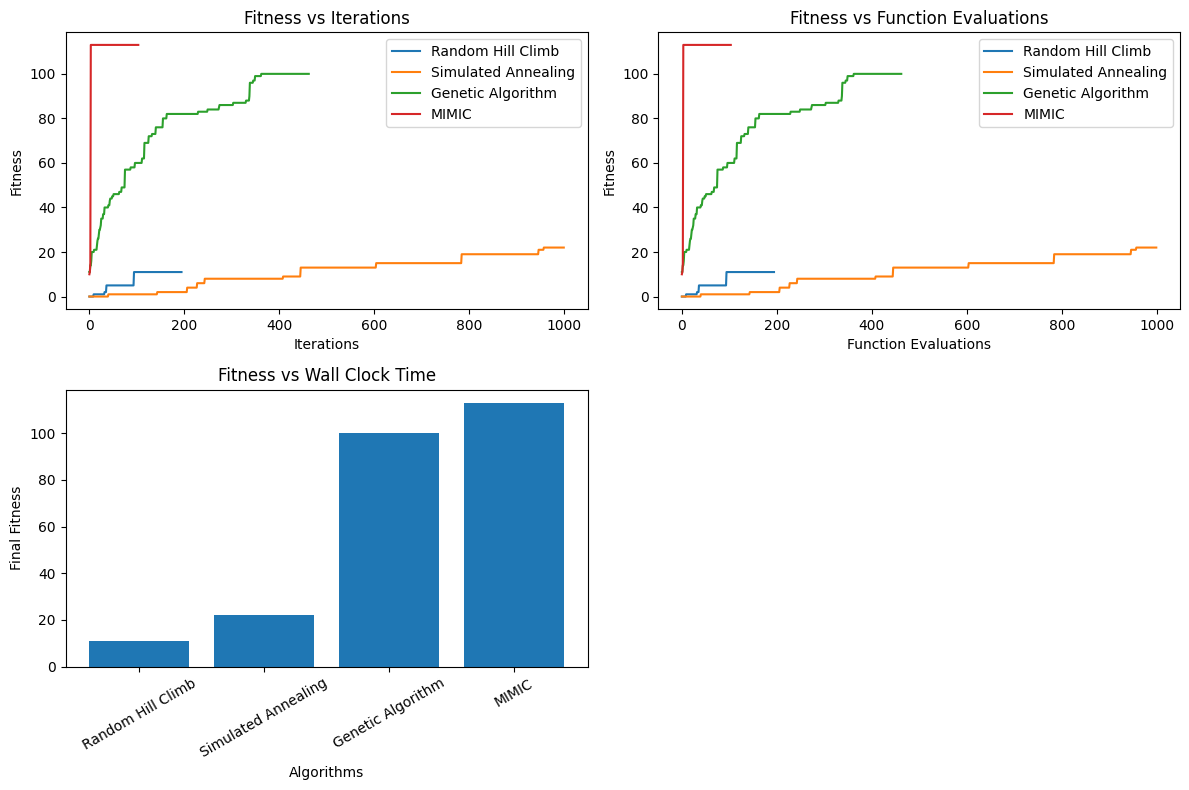

In [2]:
N = 100
T = 10
fitness = mlrose.FourPeaks(t_pct=T/N)
problem = mlrose.DiscreteOpt(length=N, fitness_fn=fitness, maximize=True, max_val=2)

algorithms = {
    "Random Hill Climb": lambda: mlrose.random_hill_climb(problem, max_attempts=100, max_iters=1000, curve=True),
    "Simulated Annealing": lambda: mlrose.simulated_annealing(problem, schedule=mlrose.ExpDecay(), max_attempts=100, max_iters=1000, curve=True),
    "Genetic Algorithm": lambda: mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=1000, curve=True),
    "MIMIC": lambda: mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=1000, curve=True)
}

results = {}

for name, algo in algorithms.items():
    start_time = time.time()
    best_state, best_fitness, fitness_curve = algo()
    end_time = time.time()
    
    results[name] = {
        "fitness_curve": fitness_curve[:, 0],
        "function_evals": len(fitness_curve),
        "wall_clock_time": end_time - start_time,
        "final_fitness": best_fitness
    }

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data["fitness_curve"], label=name)
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Fitness vs Iterations")
plt.legend()

plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(range(data["function_evals"]), data["fitness_curve"], label=name)
plt.xlabel("Function Evaluations")
plt.ylabel("Fitness")
plt.title("Fitness vs Function Evaluations")
plt.legend()

plt.subplot(2, 2, 3)
bar_positions = np.arange(len(results))
bar_heights = [data["final_fitness"] for data in results.values()]
plt.bar(bar_positions, bar_heights, tick_label=list(results.keys()))
plt.xlabel("Algorithms")
plt.ylabel("Final Fitness")
plt.title("Fitness vs Wall Clock Time")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [22]:
N = 100
T = 10
fitness = mlrose.FourPeaks(t_pct=T/N)
problem = mlrose.DiscreteOpt(length=N, fitness_fn=fitness, maximize=True, max_val=2)
seed = 42
max_attempts=30
# iteration_list = 2**np.arange(10)
iteration_list=[100, 500, 1000]
restart_list = [25,75,100]

rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name="RHC",
                        seed=seed,
                        iteration_list = iteration_list,
                        max_attempts=max_attempts,
                        restart_list=restart_list
                        )

df_run_stats, df_run_curves = rhc.run()

In [18]:
best_fitness = df_run_stats["Fitness"].min()

best_runs = df_run_stats[df_run_stats["Fitness"] == best_fitness]

minimum_evaluations = best_runs["FEvals"].min()
best_run = best_runs[best_runs["FEvals"] == minimum_evaluations]
best_run

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
36,0,0.0,90,0.014522,"[np.int32(0), np.int32(0), np.int32(1), np.int...",25,1000,9
140,0,0.0,90,0.019250,"[np.int32(0), np.int32(0), np.int32(1), np.int...",75,1000,9
444,0,0.0,90,0.034065,"[np.int32(0), np.int32(0), np.int32(1), np.int...",100,1000,9


In [15]:
df_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,2.0,0,0.000167,"[np.int32(0), np.int32(1), np.int32(1), np.int...",25,512,0
1,1,2.0,1,0.003714,"[np.int32(0), np.int32(1), np.int32(1), np.int...",25,512,0
2,2,2.0,2,0.004362,"[np.int32(0), np.int32(1), np.int32(1), np.int...",25,512,0
3,4,2.0,4,0.004963,"[np.int32(0), np.int32(1), np.int32(1), np.int...",25,512,0
4,8,2.0,8,0.005604,"[np.int32(0), np.int32(1), np.int32(1), np.int...",25,512,0
...,...,...,...,...,...,...,...,...
2228,32,1.0,19764,51.939759,"[np.int32(1), np.int32(0), np.int32(0), np.int...",100,512,100
2229,64,2.0,19797,52.057439,"[np.int32(1), np.int32(0), np.int32(0), np.int...",100,512,100
2230,128,2.0,19861,52.258020,"[np.int32(1), np.int32(0), np.int32(0), np.int...",100,512,100
2231,256,2.0,19874,52.328300,"[np.int32(1), np.int32(0), np.int32(0), np.int...",100,512,100


In [16]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,1,0.003714,2.0,1.0,25,512,0
1,2,0.004362,2.0,2.0,25,512,0
2,3,0.004936,2.0,3.0,25,512,0
3,4,0.004963,2.0,4.0,25,512,0
4,5,0.005521,2.0,5.0,25,512,0
...,...,...,...,...,...,...,...
38759,137,0.013668,2.0,19870.0,100,512,100
38760,138,0.014363,2.0,19871.0,100,512,100
38761,139,0.015131,2.0,19872.0,100,512,100
38762,140,0.015176,2.0,19873.0,100,512,100
